<a href="https://colab.research.google.com/github/onssaadallah/Taxi-Demand-Prediction/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implementation of the LSTM Network for Regression**

**Import Drive**

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**Import Packages**

In [ ]:
import numpy as np
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

**Load Dataset**

In [ ]:
Data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Taxi Demand/Demand1.csv')

In [ ]:
Data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0


**preprocessing Data**

In [ ]:
#choose a taxi stand
dataset = Data['V15'].values
#Reshape dataset to normalize the dataset
dataset=dataset.reshape((-1,1))
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# fix random seed for reproducibility
np.random.seed(7)

In [ ]:
# split into train and test sets

train, test = dataset[0:9698,:], dataset[9698:len(dataset),:]


In [ ]:
#function to  create dataset to reshape the data in the forme(XY)
#X:number of Taxi demand for the given period t
#Y:number of Taxi demand at the next period(t+1)
#look_back:number of  previous time steps to use as input variables to predict the next time period
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
look_back = 5
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

**Define the Model**

In [ ]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))

model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

history = model.fit(X_train, Y_train, epochs=100, batch_size=5, validation_data=(X_test, Y_test),verbose=2, shuffle=False)



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               42400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 42,501
Trainable params: 42,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1939/1939 - 4s - loss: 0.0185 - val_loss: 0.0197
Epoch 2/100
1939/1939 - 3s - loss: 0.0178 - val_loss: 0.0191
Epoch 3/100
1939/1939 - 3s - loss: 0.0172 - val_loss: 0.0186
Epoch 4/100
1939/1939 - 4s - loss: 0.0169 - val_loss: 0.0183
Epoch 5/100
1939/1939 - 4s - loss: 0.0167 - val_loss: 0.0181
Epoch 6/100
1939/1939 - 4s - loss: 0.0166 - val_loss: 0.0180
Epoch 7/100
1939/1939 - 4s - loss: 0.0166 - val_loss: 0.0179
Epoch 8/100
1939/1939 - 4s - loss: 0.0165 - val_loss: 0.0178
Epoch 9/100
1939/1939 - 

**Model Prediction**

In [ ]:
train_predict = model.predict(X_train)

test_predict = model.predict(X_test)


In [ ]:
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
#Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

In [ ]:
#Gathering all prediction of the model
predictions=list()
for i in test_predict:
    for j in i :
        predictions.append(round(j))
        


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.0, 1.0, 0.0, 0.0, 2.0, 4.0, 5.0, 2.0, 2.0, 0.0, 2.0, 4.0, 3.0, 3.0, 1.0, 3.0, 6.0, 3.0, 5.0, 2.0, 5.0, 2.0, 9.0, 2.0, 5.0, 3.0, 9.0, 5.0, 10.0, 6.0, 10.0, 2.0, 8.0, 4.0, 8.0, 8.0, 2.0, 2.0, 2.0, 1.0, 0.0, 0.0, 0.0, 2.0, 1.0, 1.0, 2.0, 2.0, 3.0, 3.0, 4.0, 6.0, 5.0, 5.0, 9.0, 12.0, 3.0, 1.0, 15.0, 3.0, 3.0, 3.0, 10.0, 3.0, 5.0, 3.0, 3.0, 6.0, 1.0, 2.0, 3.0, 2.0, 7.0, 4.0, 6.0, 2.0, 3.0, 2.0, 5.0, 2.0, 9.0, -1.0, 6.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 4.0, 4.0, 4.0, 9.0, 4.0, 11.0, 5.0, 7.0, 3.0, 7.0, 5.0, 5.0, 5.0, 14.0, 4.0, 5.0, 4.0, 8.0, 2.0, 5.0, 4.0, 7.0, 3.0, 5.0, 3.0, 8.0, 3.0, 8.0, 2.0, 6.0, 1.0, 8.0, 0.0, 7.0, 3.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 4.0, 3.0, 4.0, 5.0, 6.0, 7.0, 10.0, 8.0, 2.0, 0.0, 8.0, 7.0, 2.0, 4.0, 7.0, 2.0, 8.0, 2.0, 6.0, 2.0, 3.0, 3.0, 5.0, 2.0, 8.0, 3.0, 11.0, 3.0, 6.0, 4.0, 6.0, 5.0, 5.0, 1.0, 7.0, 2.0, 2.0, 1.0, 0.0, 1.0, 1.0, 2.0, 1.0, 1.0, 0.0, 0.0,

In [ ]:
#Remove the negative values.
for i in range(len(predictions)):
    if (predictions[i]<=0):
        predictions[i]=0

In [ ]:
print(predictions)

[0, 0, 0, 0, 0, 0, 0, 2.0, 1.0, 1.0, 0, 0, 2.0, 4.0, 5.0, 2.0, 2.0, 0, 2.0, 4.0, 3.0, 3.0, 1.0, 3.0, 6.0, 3.0, 5.0, 2.0, 5.0, 2.0, 9.0, 2.0, 5.0, 3.0, 9.0, 5.0, 10.0, 6.0, 10.0, 2.0, 8.0, 4.0, 8.0, 8.0, 2.0, 2.0, 2.0, 1.0, 0, 0, 0, 2.0, 1.0, 1.0, 2.0, 2.0, 3.0, 3.0, 4.0, 6.0, 5.0, 5.0, 9.0, 12.0, 3.0, 1.0, 15.0, 3.0, 3.0, 3.0, 10.0, 3.0, 5.0, 3.0, 3.0, 6.0, 1.0, 2.0, 3.0, 2.0, 7.0, 4.0, 6.0, 2.0, 3.0, 2.0, 5.0, 2.0, 9.0, 0, 6.0, 2.0, 1.0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.0, 4.0, 4.0, 4.0, 9.0, 4.0, 11.0, 5.0, 7.0, 3.0, 7.0, 5.0, 5.0, 5.0, 14.0, 4.0, 5.0, 4.0, 8.0, 2.0, 5.0, 4.0, 7.0, 3.0, 5.0, 3.0, 8.0, 3.0, 8.0, 2.0, 6.0, 1.0, 8.0, 0, 7.0, 3.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 0, 0, 0, 2.0, 4.0, 3.0, 4.0, 5.0, 6.0, 7.0, 10.0, 8.0, 2.0, 0, 8.0, 7.0, 2.0, 4.0, 7.0, 2.0, 8.0, 2.0, 6.0, 2.0, 3.0, 3.0, 5.0, 2.0, 8.0, 3.0, 11.0, 3.0, 6.0, 4.0, 6.0, 5.0, 5.0, 1.0, 7.0, 2.0, 2.0, 1.0, 0, 1.0, 1.0, 2.0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 3.0, 5.0, 5.0, 4.0, 9.0, 5.0, 11.0, 3.0, 12.0, 4.0, 6.

In [ ]:
testset=Data['V15'].values[9698:len(Data)]

In [ ]:
#Save the predictions or the poisson model in csv file.
import csv
with open('/content/drive/My Drive/Colab Notebooks/Taxi Demand/Taxi Demand Prediction/LSTM/predictions_LSTM_Model.csv', 'w', newline='') as csvfile:
    fieldnames = ['predictions','realvalues']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writerow({'predictions':'predictions','realvalues':'realvalues'})
    for i in range(2352):
            writer.writerow({'predictions':str(predictions[i]),'realvalues':str(testset[i])})
  

**Model Evaluation**

In [ ]:
LSTM_Model=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Taxi Demand/Taxi Demand Prediction/LSTM/predictions_LSTM_Model.csv')
LSTM_Model.head()

,predictions,realvalues
0,0.0,1
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0


In [ ]:
#Smape Error
import numpy as np

def smape(A, F):
    return 1/len(A) * np.sum( np.abs(F - A) / (np.abs(A) + np.abs(F)+1))
smape(LSTM_Model['realvalues'].values, LSTM_Model['predictions'].values)

0.47375359676371176

In [ ]:
#RMSE Error
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(LSTM_Model['realvalues'],LSTM_Model['predictions']))
print(rms)

6.691927058411653


**Model Visualization**

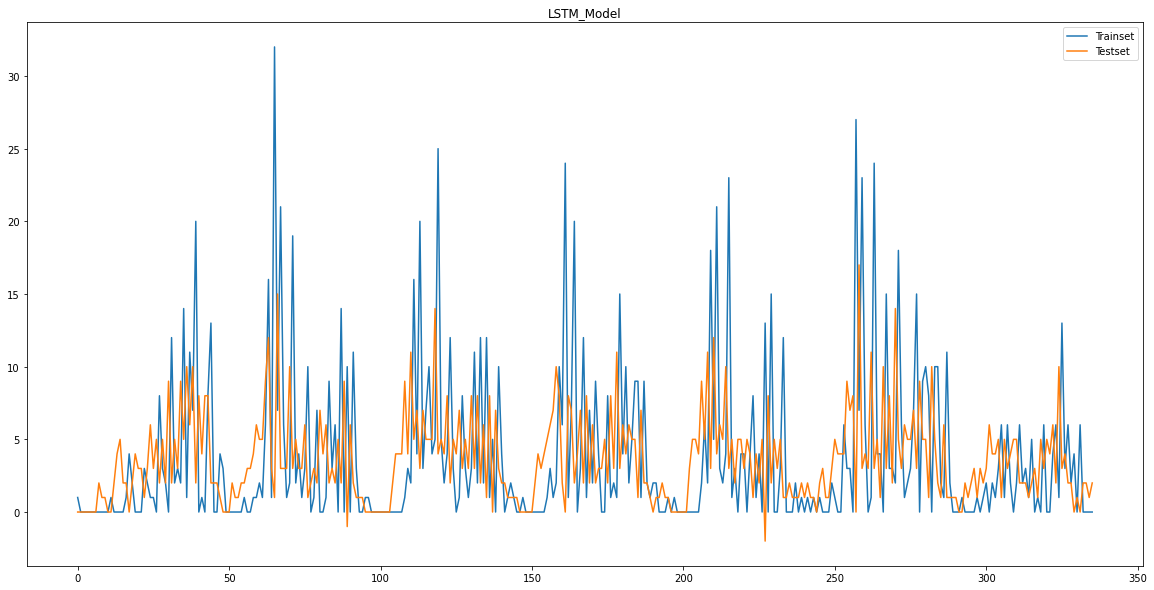

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(LSTM_Model['realvalues'][:336],label='Trainset')
plt.plot(LSTM_Model['predictions'][:336],label='Testset')
plt.legend(loc='best')
plt.title("LSTM_Model")
plt.show()